##### The goal is to build a machine learning model that predicts which Tweets are about real disasters and which one’s aren’t using dataset of 10,000 tweets that were hand classified.

### Importing Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd 

# text processing libraries
import re
import string

# sklearn 
from sklearn import model_selection
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

### Data Wrangling

Data wrangling, also known as data cleaning or data preprocessing, is the process of cleaning and transforming raw data into a format that can be easily analyzed and used for further analysis. This is an important step in the data analysis process because raw data is often incomplete, inconsistent, or contains errors.

Data wrangling typically involves several steps, such as:

Data collection: Gathering data from various sources such as databases, spreadsheets, web pages, or APIs.

Data cleaning: Identifying and fixing errors, inconsistencies, or missing values in the data.

Data transformation: Converting data into a more useful format, such as changing data types, formatting dates, or normalizing text.

Data enrichment: Combining data from multiple sources or adding new data to enhance the analysis.

Data validation: Checking the accuracy and completeness of the data after wrangling.

In [3]:
train=pd.read_csv('train.csv')
target=pd.read_csv("sample_submission.csv")
test=pd.read_csv('test.csv')

In [3]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
target.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [ ]:
test

### EDA

In [5]:
train.shape
#there are 7613 rows and 5 coloumns in the dataset

(7613, 5)

In [6]:
target.shape
#there are 3263 rows and 2 coloumns in the dataset

(3263, 2)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [8]:
((train.isnull().sum())/train.shape[0])*100

id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64

In [9]:
train['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [10]:
#Disaster Tweet
train[train['target']==1]

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [11]:
#Non-Disaster Tweet
train[train['target']==0]

,id,keyword,location,text,target
15,23,NaN,NaN,What's up man?,0
16,24,NaN,NaN,I love fruits,0
17,25,NaN,NaN,Summer is lovely,0
18,26,NaN,NaN,My car is so fast,0
19,28,NaN,NaN,What a goooooooaaaaaal!!!!!!,0
...,...,...,...,...,...
7581,10833,wrecked,Lincoln,@engineshed Great atmosphere at the British Li...,0
7582,10834,wrecked,NaN,Cramer: Iger's 3 words that wrecked Disney's s...,0
7584,10837,NaN,NaN,These boxes are ready to explode! Exploding Ki...,0
7587,10841,NaN,NaN,Sirens everywhere!,0


In [12]:
#disaster tweet
disaster_tweet=train[train['target']==1]['text']
disaster_tweet.values[1]

'Forest fire near La Ronge Sask. Canada'

In [13]:
#non-disaster tweet
Non_disaster_tweet=train[train['target']==0]['text']
Non_disaster_tweet.values[1]

'I love fruits'

In [14]:
train['keyword'].value_counts().head(20)

fatalities     45
deluge         42
armageddon     42
sinking        41
damage         41
harm           41
body%20bags    41
outbreak       40
evacuate       40
fear           40
collided       40
siren          40
twister        40
windstorm      40
sinkhole       39
sunk           39
hellfire       39
weapon         39
weapons        39
famine         39
Name: keyword, dtype: int64

In [15]:
train.nunique()

id          7613
keyword      221
location    3341
text        7503
target         2
dtype: int64

<AxesSubplot:xlabel='keyword'>

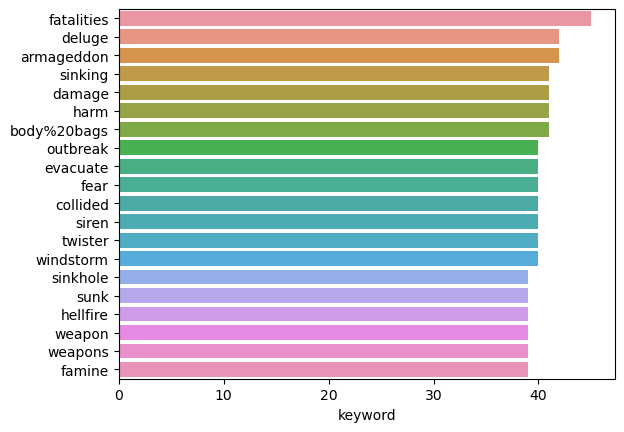

In [16]:
sns.barplot(y=train['keyword'].value_counts()[:20].index,x=train['keyword'].value_counts()[:20],
            orient='h')

<AxesSubplot:xlabel='location'>

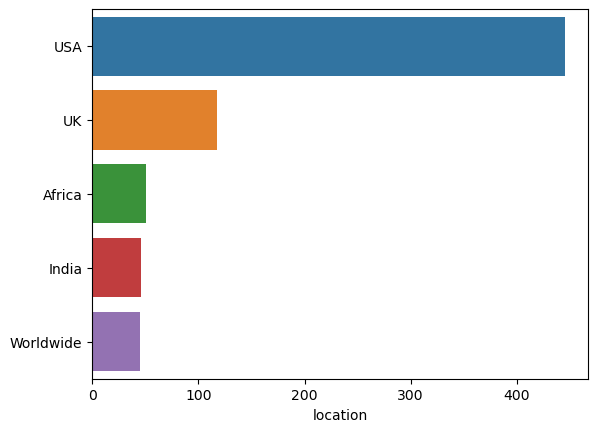

In [17]:
# Replacing the ambigious locations name with Standard names
train['location'].replace({'United States':'USA',
                           'New York':'USA',
                            "London":'UK',
                            "Los Angeles, CA":'USA',
                            "Washington, D.C.":'USA',
                            "California":'USA',
                             "Chicago, IL":'USA',
                             "Chicago":'USA',
                            "New York, NY":'USA',
                            "California, USA":'USA',
                            "FLorida":'USA',
                            "Nigeria":'Africa',
                            "Kenya":'Africa',
                            "Everywhere":'Worldwide',
                            "San Francisco":'USA',
                            "Florida":'USA',
                            "United Kingdom":'UK',
                            "Los Angeles":'USA',
                            "Toronto":'Canada',
                            "San Francisco, CA":'USA',
                            "NYC":'USA',
                            "Seattle":'USA',
                            "Earth":'Worldwide',
                            "Ireland":'UK',
                            "London, England":'UK',
                            "New York City":'USA',
                            "Texas":'USA',
                            "London, UK":'UK',
                            "Atlanta, GA":'USA',
                            "Mumbai":"India"},inplace=True)

sns.barplot(y=train['location'].value_counts()[:5].index,x=train['location'].value_counts()[:5],
            orient='h')

In [18]:
train

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


Location column is containing empty values in the most cases. Let's drop the column

In [19]:
train.drop(columns=['location'], inplace=True)
#we dropped as it has 33% null values

In [20]:
train

,id,keyword,text,target
0,1,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...
7608,10869,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,Police investigating after an e-bike collided ...,1


Text(0.5, 1.0, 'Countplot for Disaster and Non-disaster Related Tweets')

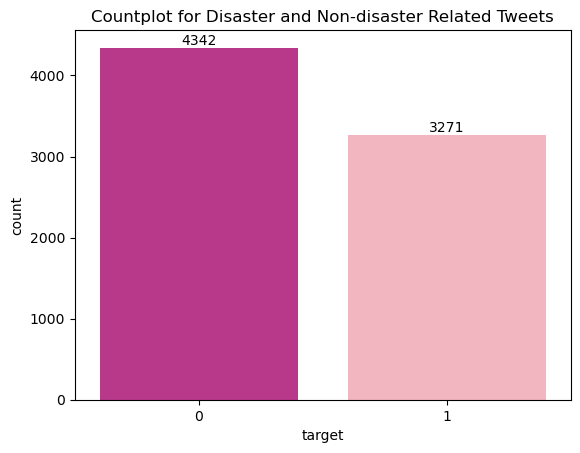

In [21]:
ax = sns.countplot(data=train, x='target', palette='RdPu_r')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Countplot for Disaster and Non-disaster Related Tweets')

In [22]:
#there are 4341 non disaster tweets and 3271 disaster tweets

In [23]:
train.drop(columns=['id','keyword'], inplace=True)

Find duplicate values in text and target and drop those values to ensure the accuracy. Becasue duplicates can make misleading statistics.

In [24]:
train.duplicated(['text', 'target']).sum()

92

In [25]:
train = train.drop_duplicates(["text", "target"])

In [26]:
train.shape

(7521, 2)

# Data Cleaning
Clean data to remove unnecessary information

In [27]:
import re


The 're' module in Python provides support for regular expressions, which are powerful tools for pattern matching and text manipulation.

In [28]:
train

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...
7604,#WorldNews Fallen powerlines on G:link tram: U...,1
7605,on the flip side I'm at Walmart and there is a...,1
7606,Suicide bomber kills 15 in Saudi security site...,1
7608,Two giant cranes holding a bridge collapse int...,1


In [29]:
train['text']

0       Our Deeds are the Reason of this #earthquake M...
1                  Forest fire near La Ronge Sask. Canada
2       All residents asked to 'shelter in place' are ...
3       13,000 people receive #wildfires evacuation or...
4       Just got sent this photo from Ruby #Alaska as ...
                              ...                        
7604    #WorldNews Fallen powerlines on G:link tram: U...
7605    on the flip side I'm at Walmart and there is a...
7606    Suicide bomber kills 15 in Saudi security site...
7608    Two giant cranes holding a bridge collapse int...
7612    The Latest: More Homes Razed by Northern Calif...
Name: text, Length: 7521, dtype: object

In [30]:
import string

The string module in Python provides various constants and functions related to string manipulation.

In [31]:
def clean_text(text):
    
    text=text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('u^', '', text)
    text = re.sub(r'(&amp;|&gt;|&lt;)', " ", text)
    text = re.sub(r"\s+", " ", text)
    text = re.sub(r'\t', ' ', text)
    text = re.sub(r'\n', ' ', text)
    text = re.sub(r'https?://\S+|www\.\S+', ' ',text)
    text = re.sub(r'@\S{0,}', ' USER ', text)
    text = re.sub(r"\s+", " ", text)
    text = re.sub(r'\b(USER)( \1\b)+', r'\1', text)
    text = re.sub(r'([a-zA-Z])\1{1,}', r'\1\1', text)
    text = re.sub(r"htt\S{0,}", " ", text)
    text = re.sub(r"[^a-zA-Z\d\s]", " ", text)
    text = re.sub(r'^\d\S{0,}| \d\S{0,}| \d\S{0,}$', ' NUMBER ', text)
    text = re.sub(r"\s+", " ", text)
    text = re.sub(r'\b(NUMBER)( \1\b)+', r'\1', text)
    text = re.sub(r"[0-9]", " ", text)
    text = text.strip()
    text = re.sub(r' via\s{1,}USER$', ' ', text)
    text = re.sub(r"\s+", " ", text)
    return text 

train['text']=train['text'].apply(lambda x :clean_text(x))

train['text'].head()

0    our deeds are the reason of this earthquake ma...
1                forest fire near la ronge sask canada
2    all residents asked to shelter in place are be...
3    people receive wildfires evacuation orders in ...
4    just got sent this photo from ruby alaska as s...
Name: text, dtype: object

# Word Cloud

A word cloud is a visual representation of text data, where the size of each word indicates its frequency or importance in the text. In the context of Natural Language Processing (NLP), word clouds can be useful for gaining insights into the most common or significant words in a document or a corpus of documents.

In [32]:
train

,text,target
0,our deeds are the reason of this earthquake ma...,1
1,forest fire near la ronge sask canada,1
2,all residents asked to shelter in place are be...,1
3,people receive wildfires evacuation orders in ...,1
4,just got sent this photo from ruby alaska as s...,1
...,...,...
7604,worldnews fallen powerlines on glink tram upda...,1
7605,on the flip side im at walmart and there is a ...,1
7606,suicide bomber kills in saudi security site mo...,1
7608,two giant cranes holding a bridge collapse int...,1


In [33]:
pip install wordcloud

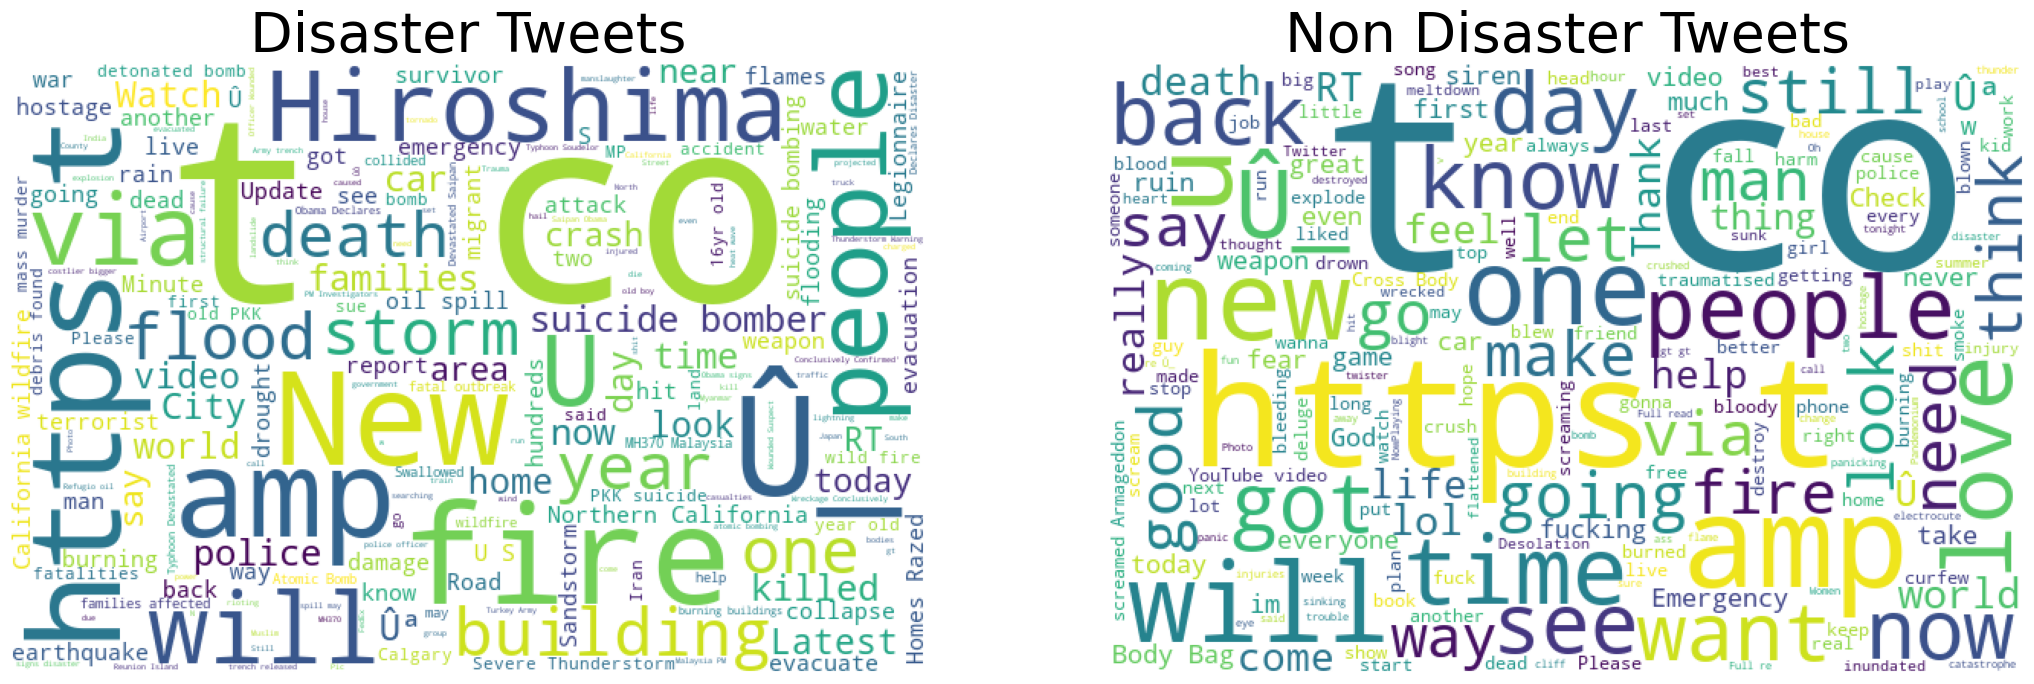

In [34]:

from wordcloud import WordCloud

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[26, 8])

wordcloud1=WordCloud(background_color='white',width=600,height=400).generate(" ".join(disaster_tweet))

ax1.imshow(wordcloud1)
ax1.axis('off')
ax1.set_title('Disaster Tweets',fontsize=40);



wordcloud2 = WordCloud( background_color='white',
                        width=600,
                        height=400).generate(" ".join(Non_disaster_tweet))
ax2.imshow(wordcloud2)
ax2.axis('off')
ax2.set_title('Non Disaster Tweets',fontsize=40);


# Text Preprocessing and Vectorization

In machine learning, text preprocessing and vectorization are important steps in preparing textual data for analysis and model training. These steps involve transforming raw text data into a format that machine learning algorithms can understand and process effectively.

Text preprocessing refers to a set of techniques used to clean and transform text data into a consistent and standardized format. It typically involves the following steps:

Tokenization: Breaking the text into individual words or smaller linguistic units called tokens.

Lowercasing: Converting all text to lowercase to ensure consistency and avoid treating the same word in different cases as different entities.

Stopword removal: Removing common words that do not carry significant meaning, such as articles, conjunctions, and prepositions.

Punctuation removal: Removing punctuation marks from the text.

Lemmatization or stemming: Reducing words to their base or root form to consolidate similar variations. Lemmatization considers the context and produces valid words, while stemming uses simple rules to truncate words.

Removing numbers or special characters: Discarding numeric values or special characters that may not contribute to the analysis.

Vectorization, on the other hand, involves representing text data in a numerical format that machine learning algorithms can process. It converts text into a structured numeric representation that captures the underlying semantic meaning of the text. Two common approaches for vectorizing text data are:

Bag-of-Words (BoW): It represents each document as a collection or "bag" of words, disregarding grammar and word order. The BoW model counts the frequency of each word in a document and constructs a sparse vector representation.

Term Frequency-Inverse Document Frequency (TF-IDF): It calculates the importance of each word in a document by considering its frequency in the document and inversely proportional to its frequency across the entire corpus. TF-IDF assigns higher weights to words that are more informative and discriminative.

After text preprocessing and vectorization, the textual data is transformed into a numerical representation suitable for training machine learning models, such as classification or clustering algorithms. These techniques help extract meaningful features from text data, enabling the algorithms to understand and make predictions based on the textual content.

In [35]:
#NLTK (Natural Language Toolkit)

This tokenizer divides a text into a list of sentences by using an unsupervised algorithm to build a model for abbreviation words, collocations, and words that start sentences.

# Tokenization

Text Preprocessing: Tokenization is often the first step in text preprocessing. By breaking down text into tokens, we can apply various text cleaning techniques such as removing punctuation, converting text to lowercase, and eliminating stop words. These preprocessing steps help reduce noise and make the text data more manageable for further analysis.

Word-Level Analysis: Tokenization at the word level allows us to analyze the text on a per-word basis. This is essential for tasks such as part-of-speech tagging, named entity recognition, and sentiment analysis. By treating each word as a separate entity, we can extract meaningful information and gain insights from the text.

Feature Extraction: Tokenization enables the extraction of features from text data, which can be used as input for machine learning models. By representing text as a sequence of tokens, we can create numerical representations like bag-of-words or word embeddings that capture the semantic and syntactic information of the text. These features serve as inputs for various machine learning algorithms.

Language Understanding: Tokenization plays a significant role in language understanding tasks. By splitting text into tokens, we can understand the structure of sentences, identify grammatical patterns, and analyze the relationships between words. Tokenization forms the basis for parsing, language modeling, and machine translation.

Information Retrieval: In information retrieval systems like search engines, tokenization allows matching user queries with indexed documents. By tokenizing both the query and the document text, it becomes easier to find relevant matches. Tokenization helps in creating inverted indexes, which store the mapping between tokens and the documents where they occur, enabling efficient search operations.

Computational Efficiency: Tokenization can improve computational efficiency by reducing the size of the data to be processed. Instead of dealing with large text documents, tokenization breaks them down into smaller units, which can be processed more efficiently. This is particularly important when working with large-scale text data.

In [36]:
#example.,this is how tokenizer divides a text 

text = "Hey this is Sujan and Im from Kundapur"
tokenizer1=nltk.tokenize.WhitespaceTokenizer()
tokenizer2=nltk.tokenize.TreebankWordTokenizer()
tokenizer3=nltk.tokenize.WordPunctTokenizer()
tokenizer4 = nltk.tokenize.RegexpTokenizer(r'\w+')

print('example Text:',text)

print("Tokenization by whitespace:- ",tokenizer1.tokenize(text))
print("Tokenization by words using Treebank Word Tokenizer:- ",tokenizer2.tokenize(text))
print("Tokenization by punctuation:- ",tokenizer3.tokenize(text))
print("Tokenization by regular expression:- ",tokenizer4.tokenize(text))

example Text: Hey this is Sujan and Im from Kundapur
Tokenization by whitespace:-  ['Hey', 'this', 'is', 'Sujan', 'and', 'Im', 'from', 'Kundapur']
Tokenization by words using Treebank Word Tokenizer:-  ['Hey', 'this', 'is', 'Sujan', 'and', 'Im', 'from', 'Kundapur']
Tokenization by punctuation:-  ['Hey', 'this', 'is', 'Sujan', 'and', 'Im', 'from', 'Kundapur']
Tokenization by regular expression:-  ['Hey', 'this', 'is', 'Sujan', 'and', 'Im', 'from', 'Kundapur']


In [37]:
#lets apply tokenize on train and test data

### Tokenizing by training and test set

In [38]:
tokenizer=nltk.tokenize.RegexpTokenizer(r'\w+')
train['text']=train['text'].apply(lambda x : tokenizer.tokenize(x))
train['text'].head()

0    [our, deeds, are, the, reason, of, this, earth...
1        [forest, fire, near, la, ronge, sask, canada]
2    [all, residents, asked, to, shelter, in, place...
3    [people, receive, wildfires, evacuation, order...
4    [just, got, sent, this, photo, from, ruby, ala...
Name: text, dtype: object

# StopWord Removal

Noise Reduction: Stop words such as "the," "and," "is," "in," etc., are highly frequent in most natural language texts. However, they often lack specific semantic meaning and are used to facilitate sentence structure or grammatical correctness. Removing stop words helps reduce noise in the text and focuses on more meaningful and informative words.

Memory and Storage Efficiency: Stop word removal reduces the size of the text data by eliminating frequently occurring words. This reduction in vocabulary size can have a significant impact on memory and storage requirements, especially when dealing with large-scale text datasets. By removing stop words, we can save computational resources and improve processing efficiency.

Improved Accuracy in Certain Tasks: Removing stop words can improve the accuracy of certain NLP tasks. For example, in tasks like sentiment analysis, where the overall sentiment of a text is determined, stop words generally do not contribute much to the sentiment classification. By eliminating them, the classifier can focus on more meaningful words, leading to improved performance.

Better Feature Extraction: In many NLP applications, text is transformed into numerical feature representations, such as bag-of-words or word embeddings, for machine learning models. Removing stop words helps in feature extraction by eliminating words that are likely to be present in almost every document, making the feature representation more focused on the distinctive words that carry more information.

Improved Interpretability: By removing stop words, the remaining words in the text often have more significant meaning and contribute more to the overall understanding of the content. This can lead to improved interpretability of the analyzed text, as the focus is on the words that convey the essential information and context.

Consistency in Text Comparison: Stop word removal can help in ensuring consistency when comparing or matching texts. By removing stop words from both the query and the target text, the comparison becomes more focused on the content-bearing words, leading to more accurate results in tasks like information retrieval or document similarity analysis.

In [39]:
train

,text,target
0,"[our, deeds, are, the, reason, of, this, earth...",1
1,"[forest, fire, near, la, ronge, sask, canada]",1
2,"[all, residents, asked, to, shelter, in, place...",1
3,"[people, receive, wildfires, evacuation, order...",1
4,"[just, got, sent, this, photo, from, ruby, ala...",1
...,...,...
7604,"[worldnews, fallen, powerlines, on, glink, tra...",1
7605,"[on, the, flip, side, im, at, walmart, and, th...",1
7606,"[suicide, bomber, kills, in, saudi, security, ...",1
7608,"[two, giant, cranes, holding, a, bridge, colla...",1


In [40]:
#example
from stop_words import get_stop_words

def remove_stopwords(text):
    stopwords = get_stop_words('english')
    words = text.split()
    words = [word for word in words if word.lower() not in stopwords]
    return ' '.join(words)

# Example DataFrame
df = pd.DataFrame({'text': ['This is a sample text',
                            'We want to remove stopwords',
                            'Another example sentence']})

# Apply remove_stopwords to the 'text' column
df['processed_text'] = df['text'].apply(remove_stopwords)

# Print the DataFrame
print(df)

                          text            processed_text
0        This is a sample text               sample text
1  We want to remove stopwords     want remove stopwords
2     Another example sentence  Another example sentence


### Manually removing stopwords from the rows

In [41]:
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'your', 'yours',
    'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', 'her', 'hers', 'herself',
    'it', 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which',
    'who', 'whom', 'this', 'that', 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be',
    'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an',
    'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by',
    'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before',
    'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over',
    'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why',
    'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such',
    'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can',
    'will', 'just', 'don', 'should', 'now']


# Function to remove stopwords from a list
def remove_stopwords(tokens):
    tokens = [token for token in tokens if token.lower() not in stopwords]
    return tokens

# Apply remove_stopwords to the 'text' column
train['text'] = train['text'].apply(lambda x: remove_stopwords(x))
# Print the DataFrame
print(train.head())

                                                text  target
0  [deeds, reason, earthquake, may, allah, forgiv...       1
1      [forest, fire, near, la, ronge, sask, canada]       1
2  [residents, asked, shelter, place, notified, o...       1
3  [people, receive, wildfires, evacuation, order...       1
4  [got, sent, photo, ruby, alaska, smoke, wildfi...       1


# Stemming

Stemming is a process used in natural language processing and text mining to reduce words to their root or base form, known as the stem. The main purpose of stemming is to reduce the dimensionality of the vocabulary and to group together related words.

Here are some reasons why we use stemming:

Normalization: Stemming helps in normalizing the words by reducing them to their base form. It eliminates variations in word endings and suffixes, allowing different forms of the same word to be treated as a single word. For example, stemming would convert "running," "runs," and "ran" to the base form "run."

Reducing Vocabulary Size: By stemming words to their base form, we can reduce the overall vocabulary size. This can be beneficial for text analysis tasks, such as document classification or information retrieval, where a smaller vocabulary size can lead to improved computational efficiency and reduced memory requirements.

Improving Information Retrieval: In some cases, users may search for a word in its base form rather than its various inflected forms. By stemming words, we can increase the chances of matching the search query with the indexed documents.

Consolidating Similar Words: Stemming helps in consolidating words with the same root. This can be useful for tasks that involve identifying patterns or trends across a large corpus of text. By grouping similar words together, we can gain insights into common themes or topics.

In [42]:
def stem(word):
    if word.endswith("ing"):
        # Remove "ing" from the end of the word
        return word[:-3]
    return word

def lemmatize(word):
    # Add more lemmatization rules based on your specific needs
    if word == "ran":
        return "run"
    elif word == "jumped":
        return "jump"
    return word

def process_text(text):
    # Split the text into words
    words = text.split()
    # Apply stemming and lemmatization to each word
    stemmed_words = [stem(word) for word in words]
    lemmatized_words = [lemmatize(word) for word in stemmed_words]
    # Join the words back into a processed text
    processed_text = ' '.join(lemmatized_words)
    return processed_text

# Example usage
text = "Running and jumped"
processed_text = process_text(text)
print("Processed text:", processed_text)

Processed text: Runn and jump


In [43]:

def remove_suffixes(word, suffixes):
    for i in suffixes:
        if word.endswith(i):
            stemmed_word = word[:-len(i)]
            return stemmed_word
    return word

def preprocess_text(text, suffixes):
    tokens = [token for token in text if token.lower() not in stopwords]  # Remove stopwords
    stemmed_tokens = [remove_suffixes(token, suffixes) for token in tokens]  # Remove suffixes
    preprocessed_text = ' '.join(stemmed_tokens)
    return preprocessed_text

# Define the stemming suffixes
stemming_suffixes = ['s', 'es', 'ed', 'ing', 'er', 'est', 'ly', 'able', 'er/or', 'ion']

# Apply preprocessing to the 'text' column in the 'train' DataFrame
train['text'] = train['text'].apply(lambda x: preprocess_text(x, stemming_suffixes))


# Print the DataFrame
print(train.head())

                                                text  target
0         deed reason earthquake may allah forgive u       1
1                 for fire near la ronge sask canada       1
2  resident ask shelt place notifi officer evacua...       1
3   people receive wildfire evacuat order california       1
4  got sent photo ruby alaska smoke wildfire pour...       1


In [44]:
#The - symbol in word[:-len(suffix)] is used to slice the word and remove the suffix from it.

Stemming aims to reduce words to a base form by removing suffixes or prefixes, while lemmatization aims to determine the base or dictionary form of a word taking into account the word's part of speech and meaning. Stemming may result in non-linguistic or non-dictionary forms, while lemmatization ensures that the resulting word is a valid word in the language.

# Feature extraction

Convert the text data into numerical features using a vectorization technique. In this example, we will use TF-IDF vectorization.

TF-IDF (Term Frequency-Inverse Document Frequency) is a commonly used technique in natural language processing (NLP) to convert text data into numerical features. The TfidfVectorizer is a class in scikit-learn library that implements the TF-IDF vectorization.

TF-IDF takes into account the importance of a term in a document relative to its importance in the entire corpus (collection of documents). It consists of two main components:

Term Frequency (TF): It measures the frequency of a term in a document. It indicates how often a term appears in a specific document.

Inverse Document Frequency (IDF): It measures the rarity of a term across the entire corpus. It reduces the weight of terms that appear frequently in many documents and assigns higher weights to terms that are more unique to a specific document.

The TfidfVectorizer combines these two components to assign weights to each term in the document. It calculates the TF-IDF score for each term-document pair, resulting in a numerical representation of the text data.

By using TF-IDF vectorization, we can capture the important words or terms that distinguish one document from another. This numerical representation can then be used as input to machine learning algorithms for tasks such as classification or clustering.

In the context of predicting Twitter disaster tweets, TF-IDF vectorization can help identify important words or phrases that are indicative of a disaster tweet. These features can then be used to train a machine learning model to predict whether a given tweet is related to a disaster or not.








In [45]:
# Initialize the TF-IDF vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create an instance of TfidfVectorizer
vectorizer = CountVectorizer(stop_words=stopwords)
# Fit and transform the training data

vectors = vectorizer.fit_transform(train['text'])
# Transform the testing data
vectors.shape

(7521, 13942)

In [46]:
X = vectors.toarray()
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [47]:
Y = train['target'].values 
Y 

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

### Split the dataset
Split the dataset into training and testing sets using train_test_split from scikit-learn.

In [48]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.30, random_state=42)

### Model Building

# Logistic Regression

Logistic regression is a popular machine learning algorithm used for binary classification tasks, where the goal is to predict a binary outcome (e.g., whether an email is spam or not, whether a customer will churn or not). Despite its name, logistic regression is a classification algorithm and not a regression algorithm.

In [49]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [50]:
# prediction on test data
y_pred = model.predict(X_test)

In [51]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8037217545414267


In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84      1304
           1       0.81      0.71      0.75       953

    accuracy                           0.80      2257
   macro avg       0.80      0.79      0.79      2257
weighted avg       0.80      0.80      0.80      2257



In [53]:
f1_score = metrics.f1_score(y_test, y_pred) # F Measure 
recall = metrics.recall_score(y_test, y_pred)
print("F1_score:", f1_score)
print("Recall:", recall)

F1_score: 0.752375628842929
Recall: 0.7061909758656874


In [54]:
#confusion matrix

In [55]:
y_pred_proba =model.predict_proba(X_test)
print('Predicted probability',y_pred_proba)

Predicted probability [[0.84099721 0.15900279]
 [0.20021312 0.79978688]
 [0.77774136 0.22225864]
 ...
 [0.00404937 0.99595063]
 [0.85595467 0.14404533]
 [0.29711664 0.70288336]]


Confusion matrix [[1141  163]
 [ 280  673]]


Text(50.722222222222214, 0.5, 'True')

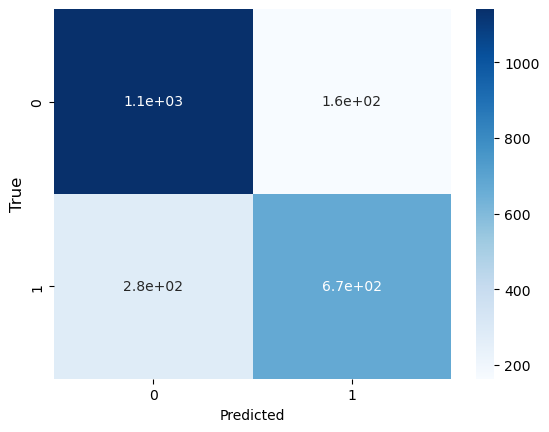

In [56]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
group_names = ['TN','FP','FN','TP']
print("Confusion matrix",cnf_matrix)
sns.heatmap(cnf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('True', fontsize=12)

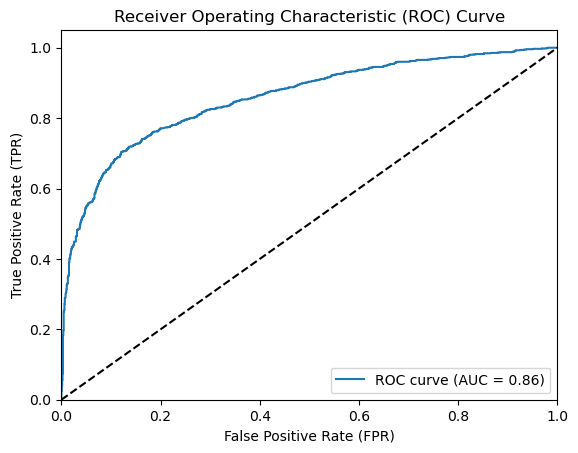

In [59]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the predicted probabilities for the test data
y_pred_proba = model.predict_proba(X_test)

# Extract the probabilities for the positive class (class 1)
y_pred_proba_positive = y_pred_proba[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_positive)

# Calculate the AUC
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# Naive Bayes Classifier


The Naive Bayes classifier is a simple yet powerful machine learning algorithm that is based on the Bayes' theorem. It is widely used for classification tasks, especially in text classification and spam filtering.

The algorithm is called "naive" because it makes a strong assumption of feature independence. It assumes that the presence or absence of a particular feature in a class is independent of the presence or absence of other features. This is known as the "naive" assumption, and it simplifies the calculation of probabilities.

In [60]:
from sklearn.naive_bayes import GaussianNB

# Create an instance of the Naive Bayes classifier
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [61]:
# prediction on test data
y_pred = model.predict(X_test)

In [62]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.615861763402747
              precision    recall  f1-score   support

           0       0.76      0.49      0.59      1304
           1       0.53      0.79      0.63       953

    accuracy                           0.62      2257
   macro avg       0.65      0.64      0.61      2257
weighted avg       0.66      0.62      0.61      2257



In [63]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      0.49      0.59      1304
           1       0.53      0.79      0.63       953

    accuracy                           0.62      2257
   macro avg       0.65      0.64      0.61      2257
weighted avg       0.66      0.62      0.61      2257



In [64]:
y_pred_proba =model.predict_proba(X_test)
print('Predicted probability',y_pred_proba)

Predicted probability [[1. 0.]
 [0. 1.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


Confusion matrix [[636 668]
 [199 754]]


Text(50.722222222222214, 0.5, 'True')

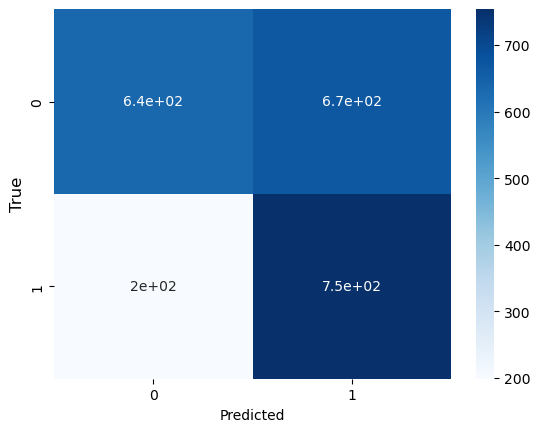

In [65]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
group_names = ['TN','FP','FN','TP']
print("Confusion matrix",cnf_matrix)
sns.heatmap(cnf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('True', fontsize=12)

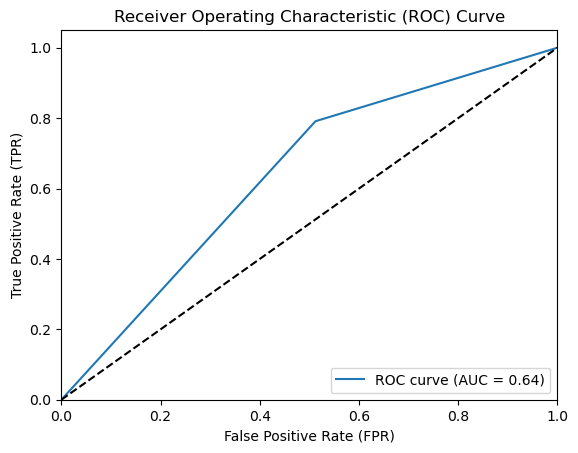

In [66]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the predicted probabilities for the test data
y_pred_proba = model.predict_proba(X_test)

# Extract the probabilities for the positive class (class 1)
y_pred_proba_positive = y_pred_proba[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_positive)

# Calculate the AUC
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# RandomForestClassifier

Random Forest: Random Forest is an ensemble algorithm that combines multiple decision trees. It can handle both numerical and categorical data, and it's robust against overfitting.

In [67]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [68]:
# prediction on test data
y_pred = model.predict(X_test)

In [69]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.7797961896322552
              precision    recall  f1-score   support

           0       0.76      0.89      0.82      1304
           1       0.81      0.62      0.71       953

    accuracy                           0.78      2257
   macro avg       0.79      0.76      0.76      2257
weighted avg       0.78      0.78      0.77      2257



In [70]:
y_pred_proba =model.predict_proba(X_test)
print('Predicted probability',y_pred_proba)

Predicted probability [[0.63844444 0.36155556]
 [0.07833333 0.92166667]
 [0.435      0.565     ]
 ...
 [0.005      0.995     ]
 [0.99       0.01      ]
 [0.66       0.34      ]]


Confusion matrix [[1166  138]
 [ 359  594]]


Text(50.722222222222214, 0.5, 'True')

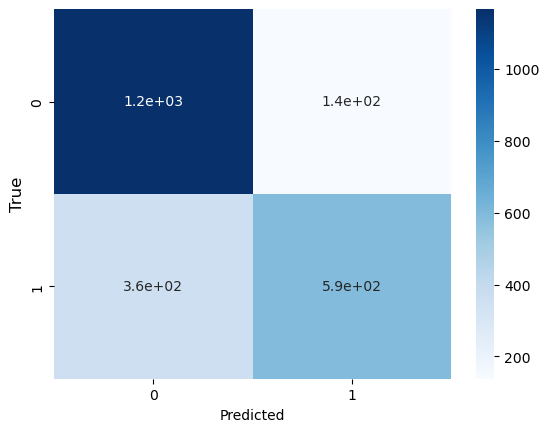

In [71]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
group_names = ['TN','FP','FN','TP']
print("Confusion matrix",cnf_matrix)
sns.heatmap(cnf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('True', fontsize=12)

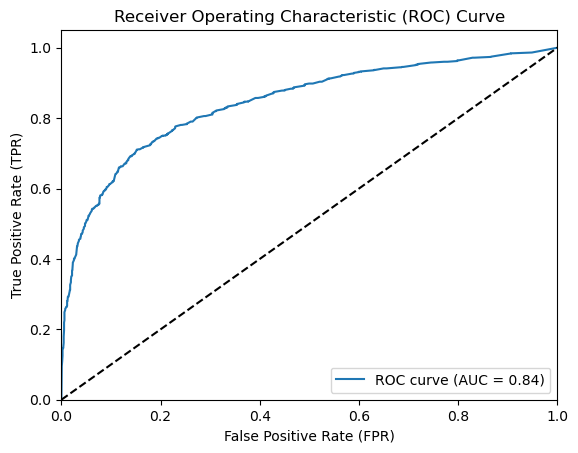

In [72]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the predicted probabilities for the test data
y_pred_proba = model.predict_proba(X_test)

# Extract the probabilities for the positive class (class 1)
y_pred_proba_positive = y_pred_proba[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_positive)

# Calculate the AUC
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# DecisionTreeClassifier

The Decision Tree algorithm builds a tree-like model of decisions and their possible consequences. It splits the data based on features to create decision rules and make predictions. Decision Trees are known for their interpretability and can handle both numerical and categorical data.

In [73]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [74]:
# prediction on test data
y_pred = model.predict(X_test)

In [75]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.7558706247230838
              precision    recall  f1-score   support

           0       0.77      0.82      0.80      1304
           1       0.73      0.66      0.70       953

    accuracy                           0.76      2257
   macro avg       0.75      0.74      0.75      2257
weighted avg       0.75      0.76      0.75      2257



In [76]:
y_pred_proba =model.predict_proba(X_test)
print('Predicted probability',y_pred_proba)

Predicted probability [[0.5 0.5]
 [0.  1. ]
 [0.  1. ]
 ...
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]]


Confusion matrix [[1075  229]
 [ 322  631]]


Text(50.722222222222214, 0.5, 'True')

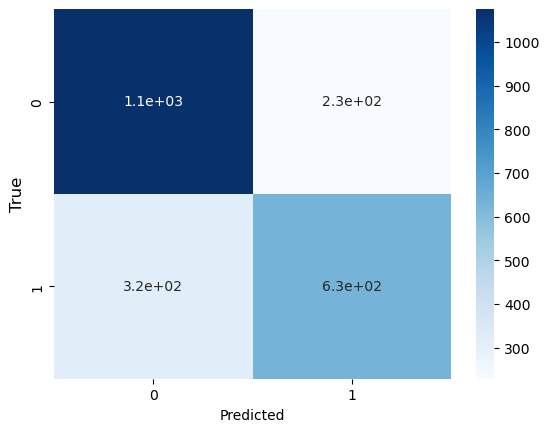

In [77]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
group_names = ['TN','FP','FN','TP']
print("Confusion matrix",cnf_matrix)
sns.heatmap(cnf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('True', fontsize=12)

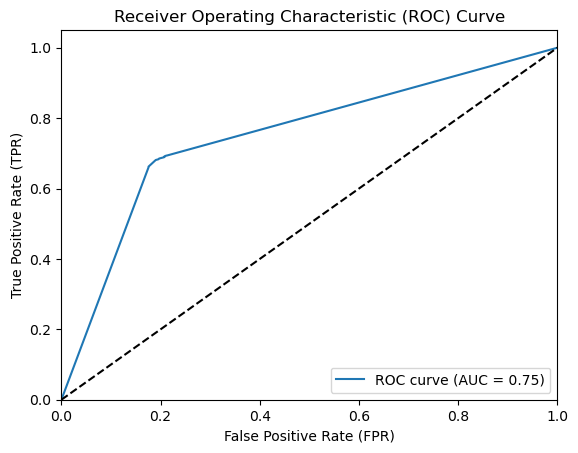

In [78]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the predicted probabilities for the test data
y_pred_proba = model.predict_proba(X_test)

# Extract the probabilities for the positive class (class 1)
y_pred_proba_positive = y_pred_proba[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_positive)

# Calculate the AUC
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# GradientBoostingClassifier

The GradientBoostingClassifier is a machine learning algorithm that belongs to the ensemble learning family. It is an extension of the gradient boosting framework and is primarily used for classification tasks. The algorithm builds an ensemble of weak prediction models, typically decision trees, in a sequential manner to create a strong predictive model.

In [79]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [80]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [81]:
# prediction on test data
y_pred = model.predict(X_test)

In [82]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))

Accuracy: 0.7523260965883917
              precision    recall  f1-score   support

           0       0.76      0.83      0.79      1304
           1       0.73      0.65      0.69       953

    accuracy                           0.75      2257
   macro avg       0.75      0.74      0.74      2257
weighted avg       0.75      0.75      0.75      2257



In [83]:
y_pred_proba =model.predict_proba(X_test)
print('Predicted probability',y_pred_proba)

Predicted probability [[0.5 0.5]
 [0.  1. ]
 [0.  1. ]
 ...
 [0.  1. ]
 [1.  0. ]
 [1.  0. ]]


Confusion matrix [[1080  224]
 [ 335  618]]


Text(50.722222222222214, 0.5, 'True')

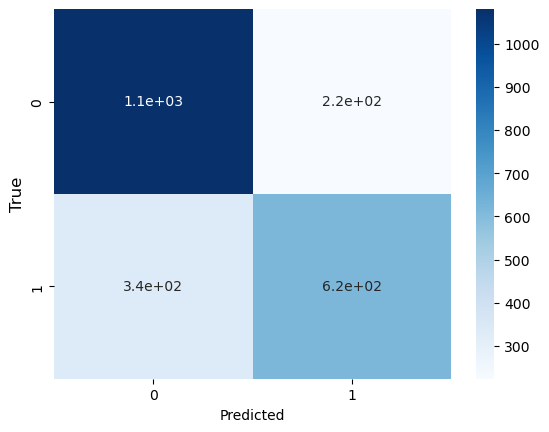

In [84]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
group_names = ['TN','FP','FN','TP']
print("Confusion matrix",cnf_matrix)
sns.heatmap(cnf_matrix, annot=True, cmap='Blues')
plt.xlabel('Predicted', fontsize=10)
plt.ylabel('True', fontsize=12)

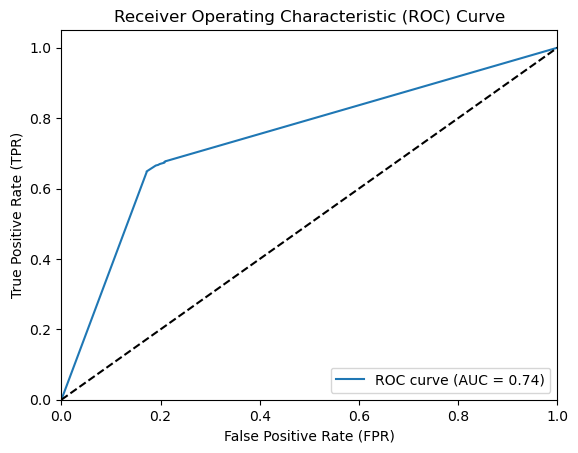

In [85]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Calculate the predicted probabilities for the test data
y_pred_proba = model.predict_proba(X_test)

# Extract the probabilities for the positive class (class 1)
y_pred_proba_positive = y_pred_proba[:, 1]

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_positive)

# Calculate the AUC
auc_score = auc(fpr, tpr)

# Plot the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the random guessing line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

AUC Score (Area Under the ROC Curve):
The AUC score evaluates the performance of a binary classification model by measuring the area under the Receiver Operating Characteristic (ROC) curve. The ROC curve plots the True Positive Rate (TPR) against the False Positive Rate (FPR) at various classification thresholds. The AUC score provides an aggregate measure of the model's ability to correctly rank the positive and negative instances. It is particularly useful in imbalanced datasets where correctly identifying the positive class (disaster tweets) is of high importance. A higher AUC score indicates a better discriminatory power of the model.

Accuracy Score:
The accuracy score measures the proportion of correctly classified instances out of the total number of instances in the dataset. It is a straightforward and commonly used metric to assess overall classification performance. If the goal of the analysis is to maximize the overall correct prediction rate, accuracy score can be a suitable metric. However, accuracy can be misleading in the case of imbalanced datasets where the number of positive (disaster) and negative (non-disaster) instances is significantly different. In such cases, a high accuracy score may be achieved by simply predicting the majority class.

In [88]:
#SO DATA IS ALMOST BALANCED, AS WE HAVING EQUAL DISTRIBUTION OF DISASTER AND NON-DISASTER., 

Logistic Regression     : Accuracy: 80.01 , Auc_Score : 86.1
            
Naive Bayes Classifier  : Accuracy: 61.50 , Auc_Score : 64.3
            
Random Forest Classifier: Accuracy: 77.00 , Auc_Score : 84.3
            
Decision Tree Classifier: Accuracy: 76.01 , Auc_Score : 75.1
            
Gradient Boosting       : Accuracy: 75.40 , Auc_Score : 74.7

In [91]:
#SO we can go with either of them., im going with a model which gives almost both ACCURACY SCORE AND AUC_SCORE as high

Logistic Regression     : Accuracy: 80.01 , Auc_Score : 86.1

### I Suggest 'Logistic Regression' Model can be good option to predict twitter disaster tweets